<a href="https://colab.research.google.com/github/michellehkim280/1stproject/blob/main/MichelleCaraSaveTheDay_part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Necessary Packages and such

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns

In [3]:
# Below is the professor's code chunk for reading in the data
var_list = ['wrkstat', 'prestige'] # List of variables you want to save
output_filename = 'selected_gss_data.csv' # Name of the file you want to save the data to
#
modes = ['w','a'] # Has write mode and append mode
phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode
#
for k in range(3): # for each chunk of the data
    url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_' + str(1+k) + '.parquet' # Create url to the chunk to be processed
    #print(url) # Check the url is correct
    df = pd.read_parquet(url) # Download this chunk of data
    #print(df.head()) # Visually inspect the first few rows
    df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                              mode=modes[phase], # control write versus append
                              header=var_list, # variable names
                              index=False) # no row index saved
    phase = 1 # Switch from write mode to append mode

In [4]:
match = [col for col in df.columns if 'educ' in col]
print("Column names:", match)

Column names: ['educ', 'paeduc', 'maeduc', 'speduc', 'coeduc', 'nateduc', 'nateducy', 'nateducz', 'educop', 'coneduc', 'coneducy', 'sexeduc', 'educ1', 'educ2', 'educ3', 'educ4', 'educ5', 'sppaeduc', 'spmaeduc', 'kdeduc1', 'kdeduc2', 'kdeduc3', 'kdeduc4', 'kdeduc5', 'kdeduc6', 'kdeduc7', 'kdeduc8', 'kdeduc9', 'sbeduc', 'voleduc', 'moneduc', 'hrseduc', 'giveduc', 'toteduc', 'valeduc', 'educ30', 'inteduc', 'opeduc', 'richeduc', 'educemp', 'reducemp', 'payeduc', 'immeduc', 'chldeduc', 'sei10educ', 'pasei10educ', 'masei10educ', 'spsei10educ', 'cosei10educ']


In [5]:
unique_responses = df['coninc'].value_counts()
print("Unique Responses:")
print(unique_responses)

na_count = df['coninc'].isna().sum()
# Print the number of NAs
print(f"Number of NAs in '{'coninc'}': {na_count}")

Unique Responses:
168736.29696    702
45360.00000     671
67200.00000     575
55440.00000     554
36960.00000     492
               ... 
3447.00000       10
4556.50000        9
3737.25000        9
4213.00000        8
3613.50000        8
Name: coninc, Length: 203, dtype: int64
Number of NAs in 'coninc': 2728


# DATA CLEANING CODE BEGINS BELOW!!!!!

Age Cleaning

In [6]:
# Dropping any rows where the age of person is missing. As documented in codebook, only 5% of count did not answer
df = df.dropna(subset=['age'])

Income Cleaning

In [8]:
df['coninc'] = df['coninc'].round(2)

Happiness Rank Cleaning

In [10]:
# Converting to ordered categorical type with predefined categories (categories from codebook
# and replacing any missing values in this column with the category 'unanswered'
# This ensures consistent data categorization and handles missing data

categories = ['pretty happy', 'very happy', 'not too happy', 'unanswered']
df['happy'] = pd.Categorical(df['happy'], categories=categories, ordered=True)
# Replace NAs in 'happy' column with 'unanswered'
df['happy'].fillna('unanswered', inplace=True)

Health Rank Cleaning

In [12]:
# Same reasoning as above
cat_health = ['good', 'excellent', 'fair', 'poor', 'unanswered']
df['health'] = pd.Categorical(df['health'], categories=cat_health, ordered=True)
# Replace NAs in 'health' column with 'unanswered'
df['health'].fillna('unanswered', inplace=True)

Sex Cleaning

In [14]:
# Same reasoning as above, not including other genders as we are following codebook
cat_sex = ['female', 'male', 'unanswered']
df['sex'] = pd.Categorical(df['sex'], categories=cat_sex, ordered=True)
# Replace NAs in 'sex' column with 'unanswered'
df['sex'].fillna('unanswered', inplace=True)

Marital Status Cleaning

In [16]:
# Marital status cleaning
cat_marital = ['married', 'never married', 'divorced', 'widowed', 'separated',
               'unanswered']
df['marital'] = pd.Categorical(df['marital'], categories=cat_marital, ordered=True)
# Replace NAs in 'marital' column with 'unanswered'
df['marital'].fillna('unanswered', inplace=True)

In [18]:
# Degree cleaning
cat_deg = ['less than high school', 'high school', 'associate/junior college',
           "bachelor's", 'graduate',
               'unanswered']
df['degree'] = pd.Categorical(df['degree'], categories=cat_deg, ordered=True)
# Replace NAs in 'sex' column with 'unanswered'
df['degree'].fillna('unanswered', inplace=True)

In [19]:
df = df.loc[:, ['age', 'sex', 'marital', 'income', 'degree', 'happy', 'health']]

In [25]:
df.to_csv('MichelleCara (1).csv', index=False)

# Visualizations & Analysis!

Reading the Cleaned Data File

In [28]:
df = pd.read_csv('MichelleCara (1).csv', low_memory=False)
print(df)

        age     sex        marital    coninc                    degree  \
0      48.0    male        married  105852.0               high school   
1      25.0    male  never married   72774.0                bachelor's   
2      42.0    male       divorced   59542.0                bachelor's   
3      24.0    male  never married   33079.0               high school   
4      24.0  female        married   72774.0                bachelor's   
...     ...     ...            ...       ...                       ...   
23534  22.0  female  never married   18480.0               high school   
23535  29.0  female        married   45360.0                  graduate   
23536  32.0    male  never married   94080.0  associate/junior college   
23537  49.0  female        married  107520.0                  graduate   
23538  50.0    male        married   67200.0                  graduate   

              happy      health  
0        unanswered        poor  
1      pretty happy  unanswered  
2      pr

In [43]:
# Ignoring unanswered/NAs on graphs because it is not relevant for analysis
df = df[df['health'] != 'unanswered']
df = df[df['happy'] != 'unanswered']
df = df[df['marital'] != 'unanswered']
# Cleaning marital column for graph specifics
df['marital'] = df['marital'].apply(lambda x: 'not married' if x != 'married' else x)
# Continuing ignoring unanswered
df = df[df['degree'] != 'unanswered']
df = df[df['sex'] != 'unanswered']

Isolating the few variables we want to analyze and seeing what values to expect

In [44]:
# We can first list all of the possible responses given for 'income':
coninc_responses = []
for response in df['coninc']:
    if response not in coninc_responses:
        coninc_responses.append(response)
print(coninc_responses)

[72774.0, 105852.0, 88211.0, 48516.0, 39695.0, 12129.0, 14334.0, 5734.0, 3087.0, 28668.0, 24258.0, 18745.0, 33079.0, 20950.0, 59542.0, nan, 6616.0, 9924.0, nan, 16539.0, nan, nan, nan, nan, nan, nan, nan, nan, 178266.0, 123496.0, 3969.0, nan, nan, 7939.0, nan, nan, nan, nan, nan, nan, 1764.0, nan, nan, nan, nan, nan, nan, nan, nan, 4852.0, nan, nan, nan, nan, nan, nan, nan, 441.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, n

In [45]:
# Can repeat for 'health':
health_responses = []
for response in df['health']:
    if response not in health_responses:
        health_responses.append(response)
print(health_responses)

['excellent', 'good', 'poor', 'fair']


In [46]:
# And then 'age':
age_responses = []
for response in df['age']:
    if response not in age_responses:
        age_responses.append(response)
print(age_responses)

[24.0, 52.0, 42.0, 48.0, 30.0, 23.0, 50.0, 35.0, 33.0, 21.0, 77.0, 70.0, 26.0, 89.0, 72.0, 53.0, 79.0, 58.0, 51.0, 82.0, 36.0, 34.0, 27.0, 39.0, 44.0, 80.0, 60.0, 43.0, 49.0, 62.0, 69.0, 63.0, 55.0, 85.0, 41.0, 78.0, 75.0, 67.0, 84.0, 28.0, 20.0, 38.0, 73.0, 66.0, 31.0, 54.0, 65.0, 47.0, 29.0, 19.0, 46.0, 57.0, 64.0, 40.0, 37.0, 68.0, 45.0, 32.0, 25.0, 74.0, 83.0, 59.0, 56.0, 22.0, 71.0, 61.0, 18.0, 86.0, 81.0, 76.0, 88.0, 87.0]


In [47]:
# And lastly 'degree':
degree_responses = []
for response in df['degree']:
    if response not in degree_responses:
        degree_responses.append(response)
print(degree_responses)

["bachelor's", 'associate/junior college', 'graduate', 'high school', 'less than high school']


# The Impact of Health and Age on Happiness

To begin, we can see the distribution of health quality across all of the data, without analyzing any certain variables other than health.

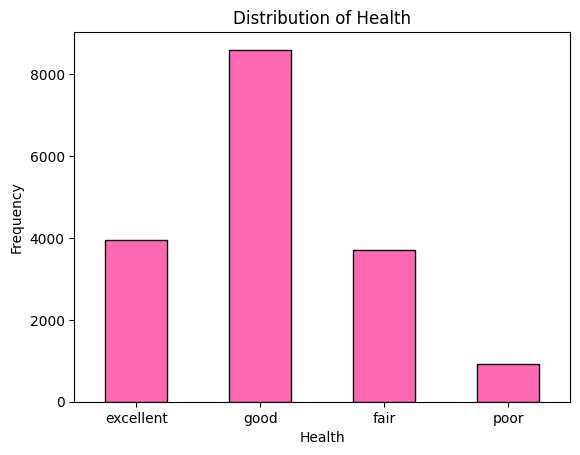

In [48]:
df['health'].value_counts().sort_index().plot(kind='bar',
                                              color='hotpink', edgecolor='black')
plt.title('Distribution of Health')
plt.xlabel('Health')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

As well as the distribution for happiness, to see the entire scope of the data we are working with.

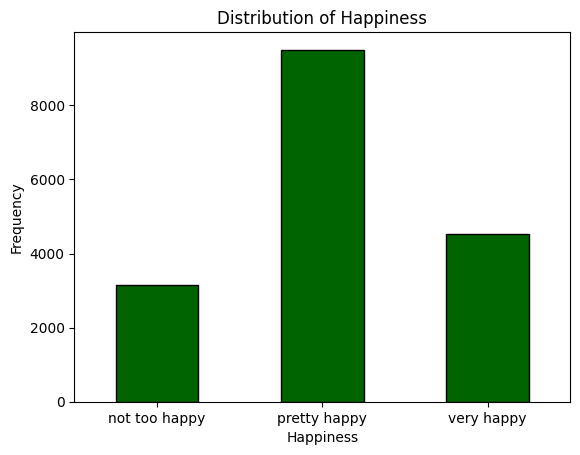

In [49]:
df['happy'].value_counts().sort_index().plot(kind='bar', color='darkgreen', edgecolor='black')
plt.title('Distribution of Happiness')
plt.xlabel('Happiness')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

As mentioned before, we will not look at the 'unanswered' data in our actualy analytical graphs, as it is not necessary in making insights.

In [50]:
df = df[df['health'] != 'unanswered']

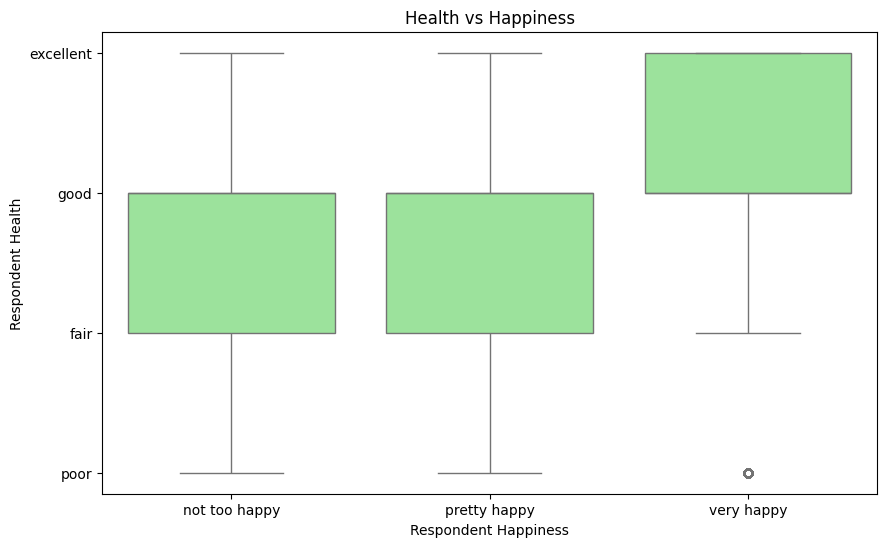

In [51]:
#  Graph of health v happiness
health_order = ['excellent', 'good', 'fair', 'poor']
happiness_order = ['not too happy', 'pretty happy', 'very happy']
df['health'] = pd.Categorical(df['health'], categories=health_order,
                              ordered=True)
plt.figure(figsize=(10, 6))
sns.boxplot(x='happy', y='health', data=df, order=happiness_order,
            hue_order=health_order, color="lightgreen")
plt.xlabel('Respondent Happiness')
plt.ylabel('Respondent Health')
plt.title('Health vs Happiness')
plt.show()

Here we can see that the 'very happy' group has the highest median in respondent's health status, in comparision to the 'not too happy' and 'pretty happy' groups. The outlier in the 'very happy' category does suggest that there is at least one respondent who reported being very happy but has a poor health status, well outside the typical range for that group. However, this is just a single outlier amongst thousands of responses of being 'very happy'. This box plot suggests that those who report being happier also report being in better health. However, it's worth noting that correlation does not imply causation, and this graph alone does not indicate whether happiness improves health. Many factors can contribute to health, such as age.







To begin looking at age, we can first analyze the density of age groups that we are working with. As seen in the kernal density plout, our data evenly consists of most age groups, with the exception of older age groups (75+) and younger (<20).

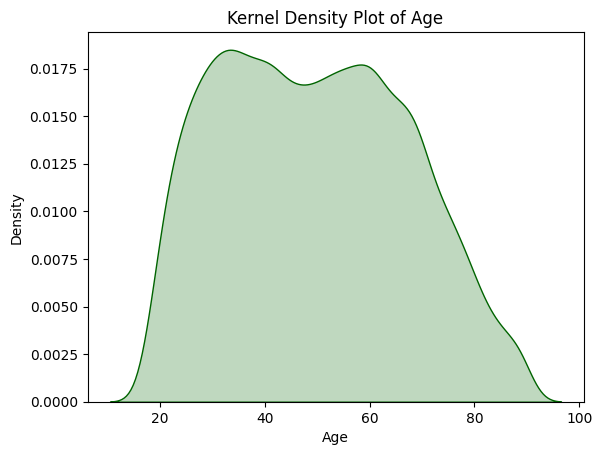

In [52]:
sns.kdeplot(data=df['age'], fill=True, color='darkgreen')
plt.title('Kernel Density Plot of Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

<Axes: xlabel='age', ylabel='Density'>

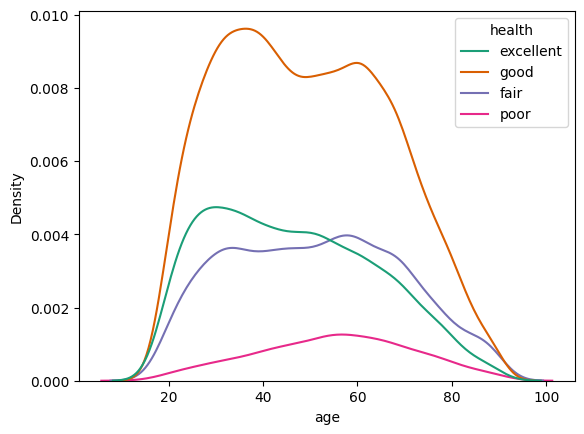

In [41]:
sns.kdeplot(data=df,x='age',hue='health', palette='Dark2')

Here we can see the "excellent" health condition has a high peak and is left-skewed, suggesting that a high density of younger individuals report excellent health, and it decreases with age.The "good" health condition seems to be more evenly distributed across ages, with a peak around middle age, suggesting that "good" health is reported consistently across a wider age range. The "fair" health condition has a lower peak and appears to be more common in middle-aged to older adults, with its distribution slightly right-skewed. The "poor" health condition has the lowest density, which could indicate it's less frequently reported overall. The distribution is right-skewed, implying that it becomes more common as age increases, particularly in the older age range.There seems to be a general trend of health conditions moving from "excellent" to "poor" as age increases. Younger people tend to report better health, while older individuals tend to report "fair" or "poor" health conditions more often.


We can also examine numerical statistics for each of these groups:

In [42]:
df.loc[:,['health','age']].groupby('health').describe()
# Poorest health mean person is around 55 years old

age                                                    
            count       mean        std   min   25%   50%   75%   max
health                                                               
excellent  4218.0  46.448080  17.367522  18.0  32.0  45.0  60.0  89.0
good       9085.0  49.209356  17.416991  18.0  35.0  48.0  63.0  89.0
fair       3939.0  51.214521  18.020273  18.0  36.0  51.0  65.0  89.0
poor       1002.0  55.125749  16.288795  18.0  43.0  55.5  67.0  89.0

Age and health probably coincide to explains one's lifetime happiness level fluctuations due to the similarity of the two graphs.

<Axes: xlabel='age', ylabel='Density'>

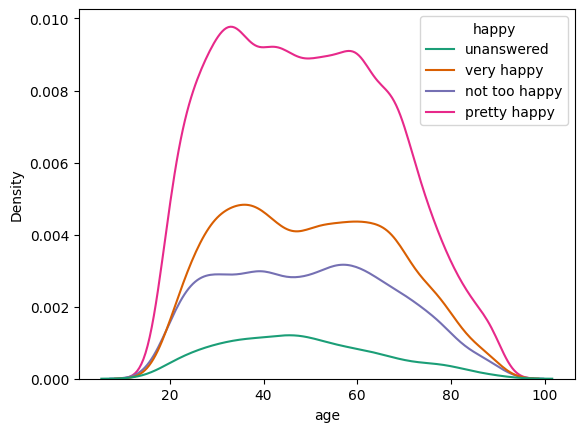

In [38]:
# Graph of age v happiness
sns.kdeplot(data=df,x='age',hue='happy', palette='Dark2')

In [39]:
df.loc[:,['happy','age']].groupby('happy').describe()
# Very happy mean age is about 50

age                                                    
                count       mean        std   min   25%   50%   75%   max
happy                                                                    
not too happy  3159.0  49.667616  17.871569  18.0  35.0  49.0  64.0  89.0
pretty happy   9534.0  48.998741  17.691370  18.0  34.0  48.0  63.0  89.0
unanswered     1000.0  47.918000  16.754282  18.0  35.0  47.0  60.0  89.0
very happy     4551.0  50.095144  17.390144  18.0  35.0  50.0  64.0  89.0

When these two graphs and sets of data are combined, they suggest that younger individuals tend to report higher happiness and better health, which both appear to decrease with age. However, there is also a presence of happiness among the older populations, despite a shift towards lower health ratings. This data shines light on how age-related changes may influence one's sense of happiness and health.

# The Impact of Income and Degree on Happiness

The majority of our data for income (coninc) is coming largely from families that have incomes on the lower end of the scale.

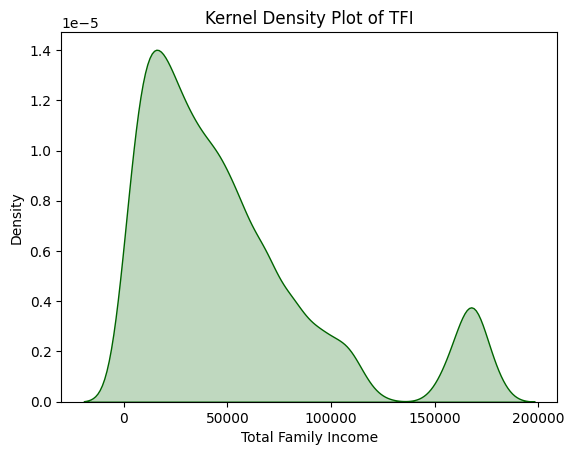

In [54]:
sns.kdeplot(data= df['coninc'], fill=True, color='darkgreen')
plt.title('Kernel Density Plot of TFI')
plt.xlabel('Total Family Income')
plt.ylabel('Density')
plt.show()

Like in the previous section, we can look for any visual trends that stand out.

<Axes: xlabel='coninc', ylabel='Density'>

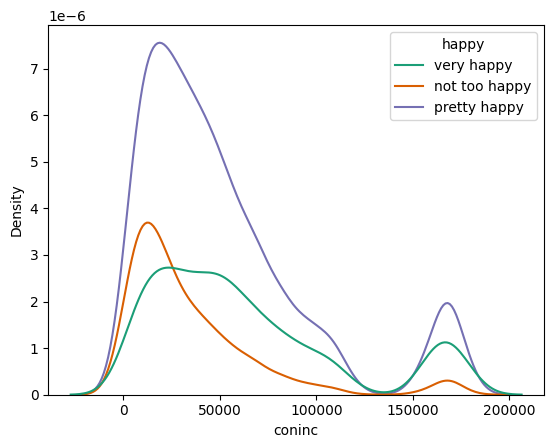

In [53]:
# Kernel plot of income v happiness
sns.kdeplot(data=df,x='coninc',hue='happy', palette='Dark2')

The highest point on each curve represents the most common income range for each level of happiness. For instance, "pretty happy" individuals most commonly fall into the lower income range, just like the "not too happy" individuals, but the mode of their income is slightly higher. Those who are "very happy" have another peak at a higher income range, suggesting that there is a significant number of very happy individuals at this higher income level as well. The "not too happy" group has a narrower peak and doesn't show as much presence in the higher income range, indicating that fewer people in this group reach the higher income levels.

There may be a correlation between income and happiness, as the "very happy" group extends further into higher income levels compared to the "not too happy" group, but the "pretty happy" group seems to have the widest distribution, implying that factors other than income may have a strong influence on the reported level of happiness. We will create a boxplot to further visualize this data.

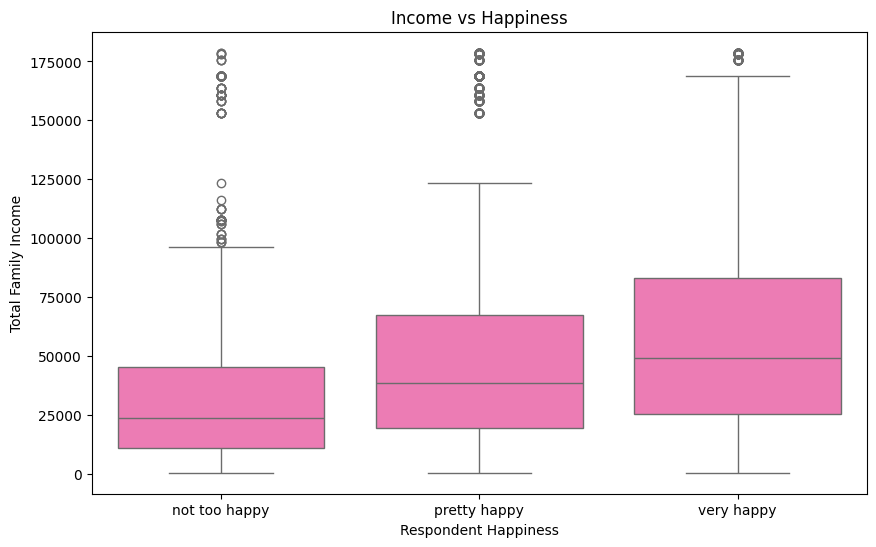

In [55]:
# Boxplot of income v happiness
happiness_order = ['not too happy', 'pretty happy', 'very happy']
plt.figure(figsize=(10, 6))
sns.boxplot(x='happy', y='coninc', data=df, order=happiness_order,
            color="hotpink")
plt.xlabel('Respondent Happiness')
plt.ylabel('Total Family Income')
plt.title('Income vs Happiness')
plt.show()

There are outliers in all categories, but they are most notable in the "not too happy" and "very happy" categories. This indicates that there are people with high incomes in all happiness categories. While there seems to be a trend that higher income corresponds with higher levels of happiness, there are clearly exceptions, as seen by the outliers. This means that while there may be a general correlation, income is not the sole determinant of happiness.

In [56]:
df.loc[:,['happy','coninc']].groupby('happy').describe()
# Mean not too happy 62,000. MONEY = HAPPINESS

coninc                                                       \
                count          mean           std    min      25%      50%   
happy                                                                        
not too happy  2804.0  34572.906915  35197.770383  336.0  10920.0  23595.0   
pretty happy   8593.0  51531.176877  44142.944682  336.0  19277.5  38555.0   
very happy     4074.0  62245.232408  48640.708493  336.0  25200.0  49005.0   

                                   
                   75%        max  
happy                              
not too happy  45360.0  178712.46  
pretty happy   67200.0  178712.46  
very happy     83050.0  178712.46

Overall, it is evident that higher income tends to lead to greater happiness levels, however, a lot of outliers are seen with higher total family income values who also answered they were not too happy (least happiest response). Despite the outliers, there is a general trend showing that higher income correlates with a happier state. We will look into degrees, which is strongly correlated with income.

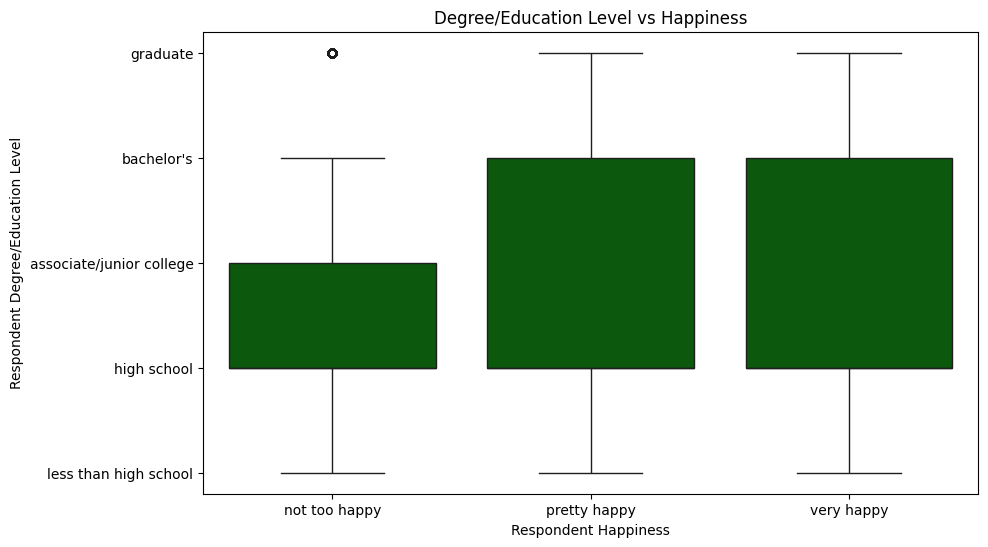

In [57]:
# Graph of education v happiness
educ_order = ['graduate',  "bachelor's",  'associate/junior college',
              'high school', 'less than high school']
df['degree'] = pd.Categorical(df['degree'], categories=educ_order,
                              ordered=True)
plt.figure(figsize=(10, 6))
sns.boxplot(x='happy', y='degree', data=df, order=happiness_order,
            hue_order=educ_order, color="darkgreen")
plt.xlabel('Respondent Happiness')
plt.ylabel('Respondent Degree/Education Level')
plt.title('Degree/Education Level vs Happiness')
plt.show()

The box plot suggests there could be a positive correlation between the level of education and reported happiness. As the education level increases, the median value of reported happiness appears to increase as well. This correlation goes along with our analysis above with income. Those with a high school education or less show a wider range in happiness levels than those with higher education, suggesting that higher education may be associated with not just increased happiness but also a more consistent level of happiness.

There are outliers in the graduate category, indicating that there are some individuals with graduate degrees who are "not too happy." This might suggest that higher education is not a guaranteed path to happiness for everyone.



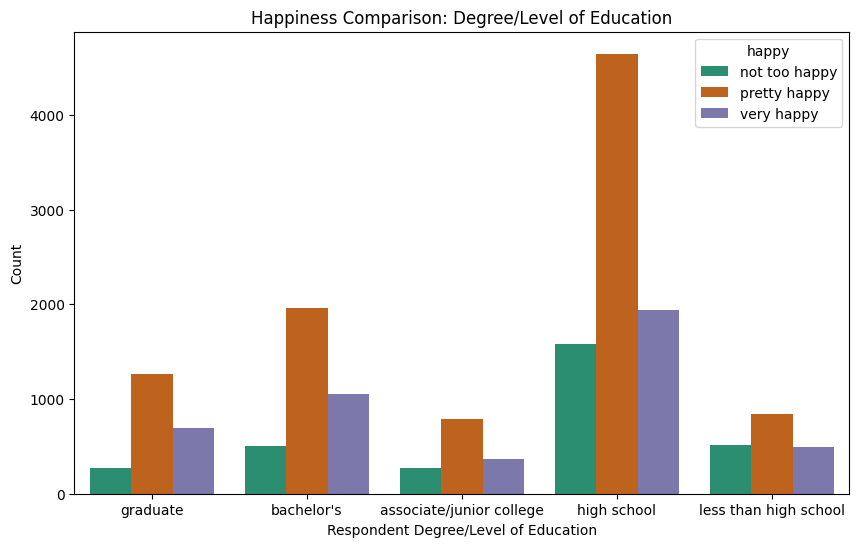

In [58]:
# 2nd Graph of education v happiness
fig, ax = plt.subplots(1,1,figsize=(10,6))
sns.countplot(x='degree', hue='happy', data=df, order=educ_order,
              hue_order=happiness_order,  palette="Dark2")
plt.xlabel('Respondent Degree/Level of Education')
plt.ylabel('Count')
plt.title('Happiness Comparison: Degree/Level of Education')
plt.show()

Even at the lower education levels (high school and less than high school), there is a significant count of respondents who report being "pretty happy" and "very happy," indicating that while there might be a trend towards higher happiness with more education, it is not absolute.

There appears to be a higher count of respondents in the high school and bachelor's categories overall, which may reflect the general education demographics of the population from which the respondents were drawn.

The data can be further shown through statistics below:

In [60]:
df.loc[:,['happy','degree']].groupby('happy').describe()
# Doesn't really give us anything

degree                          
               count unique          top  freq
happy                                         
not too happy   3147      5  high school  1582
pretty happy    9502      5  high school  4645
very happy      4539      5  high school  1936

Overall, when considering both graphs, it appears that higher levels of education are associated with higher self-reported happiness. Both the box plot and the bar chart suggest that individuals with graduate and bachelor's degrees are more likely to report being "pretty happy" or "very happy" compared to those with lower education. However, there are numbers of individuals reporting happiness across all education levels, indicating that while there may be a positive correlation between education and happiness, education is not the sole determinant of one's happiness.

# The Impact of Marital Status and Sex on Happiness

Like in previous sections, we will start by looking at the distribution of respondents.

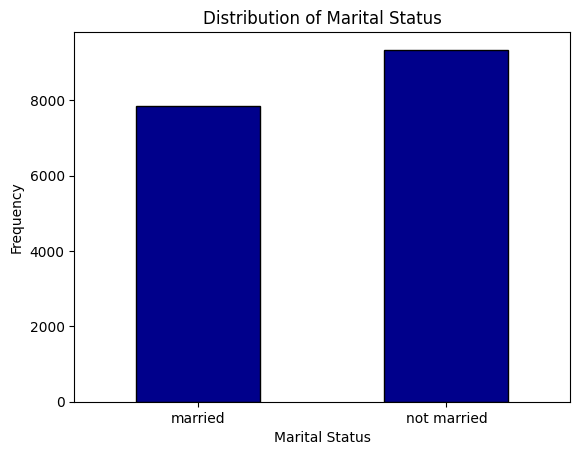

In [61]:
df['marital'].value_counts().sort_index().plot(kind='bar',
                                              color='darkblue', edgecolor='black')
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

From this, it appears that most respondents are not married, however married is not far behind in frequency, giving us a fairly even split. We will also breakdown the demographic data further by looking at sex, as it can provide additional context to these social patterns. Understanding the distribution of males and females in the sample might offer insights into whether marital status distribution is influenced by gender or if it's relatively consistent across both genders.

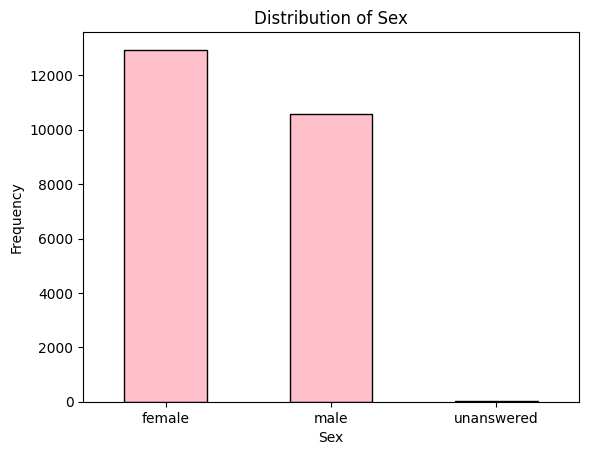

In [15]:
df['sex'].value_counts().sort_index().plot(kind='bar',
                                              color='pink', edgecolor='black')
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

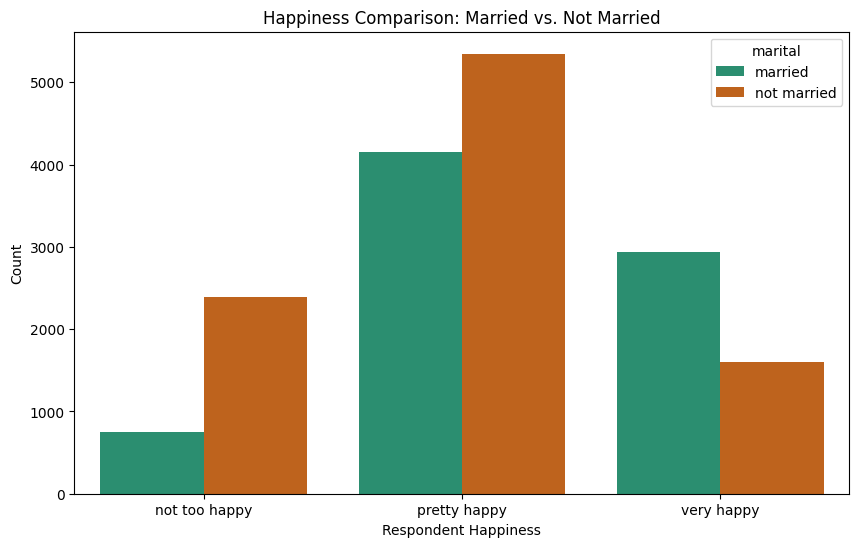

In [62]:
# Graph of marriage v happiness
fig, ax = plt.subplots(1,1,figsize=(10,6))
sns.countplot(x='happy', hue='marital', data=df, order=happiness_order,
              palette="Dark2")
plt.xlabel('Respondent Happiness')
plt.ylabel('Count')
plt.title('Happiness Comparison: Married vs. Not Married')
plt.show()

In [63]:
df.loc[:,['happy','marital']].groupby('happy').describe()
# More pretty and very happy people are married

marital                          
                count unique          top  freq
happy                                          
not too happy    3147      2  not married  2393
pretty happy     9502      2  not married  5347
very happy       4539      2      married  2938

From the bar graph, we can see the largest group for both married and not married individuals falls into the "pretty happy" category. Married respondents do have a higher count in the "very happy" category than those who are not married. There's a notable number of not married individuals who are "not too happy" compared to their married counterparts. Being married may be associated with a greater likelihood of being "very happy," although most respondents, regardless of marital status, report being "pretty happy."